{'0': TransformerStack(source=LocalCSVDataSource(path='https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_tmy3_release_2/timeseries_aggregates/by_ashrae_iecc_climate_zone_2004/upgrade=0/ashrae_iecc_climate_zone_2004=1A/up00-1a-multi-family_with_2_-_4_units.csv'), transformers=[]),
 '1': TransformerStack(source=LocalCSVDataSource(path='https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_tmy3_release_2/timeseries_aggregates/by_ashrae_iecc_climate_zone_2004/upgrade=0/ashrae_iecc_climate_zone_2004=1A/up00-1a-multi-family_with_2_-_4_units.csv'), transformers=[PandasTransformer(transform_function=<function fuel_summation_function at 0x1777268e0>, schema_function=<function fuel_summation_schema_function at 0x177726840>), LinePlot(cache=<brew_extract.core.artifacts.artifact_cache_singleton.ArtifactCacheSingleton object at 0x1146f6ad0>, stack_id='1', trans

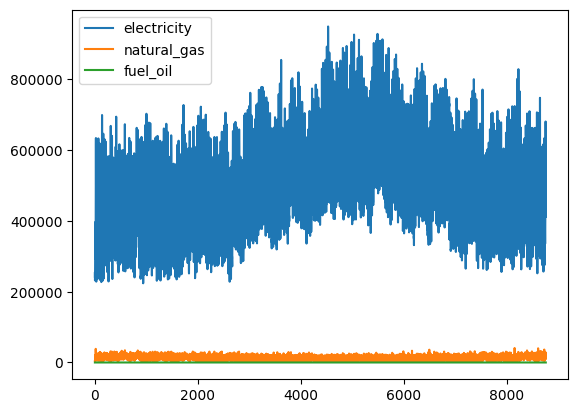

In [8]:

%matplotlib inline
import pandas as pd
import numpy as np

from brew_extract import pandas as pp
from brew_extract.pandas import data_sources as pp_data_sources
from brew_extract.pandas import artifacts as pp_artifacts

url:str = r"https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_tmy3_release_2/timeseries_aggregates/by_ashrae_iecc_climate_zone_2004/upgrade=0/ashrae_iecc_climate_zone_2004=1A/up00-1a-multi-family_with_2_-_4_units.csv"

csv_data = pp_data_sources.LocalCSVDataSource(path = url)

def fuel_summation_schema_function(schema: pp.PandasSchema):
    return pp.PandasSchema(
        {
            'electricity': np.float64,
            'natural_gas': np.float64,
            'fuel_oil': np.float64,
        }
    )

def fuel_summation_function(data: pd.DataFrame):
    fuels = [
        'electricity',
        'natural_gas',
        'fuel_oil',
    ]
    fuel_columns = {
        fuel: [col for col in data.columns if fuel in col]
        for fuel in fuels
    }

    data_dict = {fuel: data[fuel_columns[fuel]].sum(axis=1)
        for fuel, cols in fuel_columns.items()
    }
    return pd.DataFrame(data_dict)

fuel_summation_transformer = pp.PandasTransformer(
    transform_function=fuel_summation_function,
    schema_function=fuel_summation_schema_function
)

builder = pp.PandasPipelineBuilder.empty()

builder.add_source(source=csv_data, stack_id="0")
builder.add_transformer(transformer=fuel_summation_transformer, target_stack_id="1", source_stack_id="0")
builder.add_artifact(stack_id="1", artifact_class=pp_artifacts.LinePlot)
# builder.add_artifact(stack_id="0", artifact_class=pp_artifacts.LinePlot)

result_dict_by_stack = builder.generate()
builder.stacks


In [5]:
builder.stacks

{'0': TransformerStack(source=LocalCSVDataSource(path='https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_tmy3_release_2/timeseries_aggregates/by_ashrae_iecc_climate_zone_2004/upgrade=0/ashrae_iecc_climate_zone_2004=1A/up00-1a-multi-family_with_2_-_4_units.csv'), transformers=[LinePlot(cache=<brew_extract.core.artifacts.artifact_cache_singleton.ArtifactCacheSingleton object at 0x1146f6ad0>, stack_id='0', transformer_id='0')]),
 '1': TransformerStack(source=LocalCSVDataSource(path='https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_tmy3_release_2/timeseries_aggregates/by_ashrae_iecc_climate_zone_2004/upgrade=0/ashrae_iecc_climate_zone_2004=1A/up00-1a-multi-family_with_2_-_4_units.csv'), transformers=[PandasTransformer(transform_function=<function fuel_summation_function at 0x157674e00>, schema_function=<function fuel_summation_schema_function at 0